## <center> Part 1: Exploring a Dataset</center>

In [1]:
 # Loading the packages I will need:

print("Loading packages...", end = '')

import numpy as np
import pandas as pd 
import missingno as msno
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

print("Finished.")


Loading packages...Finished.


In [2]:
import os
import pandas as pd

# Folder file path
base_dir = r'C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_'

# List to store DataFrame for each year
dfs = []

# Iterate over each yearly folder
for year_folder in os.listdir(base_dir):
    year_path = os.path.join(base_dir, year_folder)
    
    # List to store DataFrame for each month
    monthly_dfs = []
    
    # Iterate over each monthly CSV file
    for month_file in os.listdir(year_path):
        if month_file.endswith('.csv'):
            month_path = os.path.join(year_path, month_file)
            
            # Specify data types for columns with mixed types (for error instances)
            dtype_options = {
                'MEXSTATE': str,
                'DF': str,
                'CONTCODE': str
            }
            
            # Read CSV file into DataFrame with specified data types
            try:
                monthly_df = pd.read_csv(month_path, dtype=dtype_options)
            except pd.errors.ParserError as e:
                print(f"Error reading file: {month_path}, {e}")
                continue
            
            # Check for NA values in the DataFrame
            na_columns = monthly_df.columns[monthly_df.isna().any()].tolist()
            if na_columns:
                print(f"NA values found in file: {month_path}, Columns: {na_columns}")
            
            # Drop columns 4, 5, and 11
            monthly_df.drop(columns=['MEXSTATE', 'CANPROV', 'DF'], inplace=True)
            
            # Append monthly DataFrame to monthly_dfs list
            monthly_dfs.append(monthly_df)
    
    # Concatenate all monthly DataFrames into one DataFrame for the year
    yearly_df = pd.concat(monthly_dfs, ignore_index=True)
    
    
    # Append yearly DataFrame to dfs list
    dfs.append(yearly_df)

# Concatenate all yearly DataFrames into one final DataFrame
final_df = pd.concat(dfs, ignore_index=True)



NA values found in file: C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007\dot2_0107.csv, Columns: ['MEXSTATE', 'CANPROV', 'DF']
NA values found in file: C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007\dot2_0207.csv, Columns: ['MEXSTATE', 'CANPROV', 'DF']
NA values found in file: C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007\dot2_0307.csv, Columns: ['MEXSTATE', 'CANPROV', 'DF']
NA values found in file: C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007\dot2_0407.csv, Columns: ['MEXSTATE', 'CANPROV', 'DF']
NA values found in file: C:\Users\julia\OneDrive\Documentos\Spring 2024\INFO 6900- Applied Machine Learning- Dr. Locke\datasets_idea_\2007\dot2_0507.csv, Columns: ['MEXSTATE', 'CANPROV', 'DF']
NA values found in file: C:\Users\j

In [3]:
final_df.head

<bound method NDFrame.head of           TRDTYPE USASTATE  COMMODITY2  DISAGMOT  COUNTRY      VALUE  \
0               1       AK           3         3     1220   145018.0   
1               1       AK           3         3     1220     5473.0   
2               1       AK           3         5     1220   203407.0   
3               1       AK           3         5     1220    73236.0   
4               1       AK           5         3     1220     3465.0   
...           ...      ...         ...       ...      ...        ...   
14986676        2       WY          95         5     1220    15925.0   
14986677        2       WY          97         3     1220     9513.0   
14986678        2       WY          98         3     1220   135187.0   
14986679        2       WY          98         5     1220    61514.0   
14986680        2       WY          98         5     1220  3869432.0   

            SHIPWT  FREIGHT_CHARGES CONTCODE  MONTH  YEAR  
0           8644.0           7846.0        X 

In [4]:
# Check unique values for column "CONTCODE"
unique_disagmot = final_df['CONTCODE'].unique()
print("Unique values for CONTCODE:", unique_disagmot)

# Check unique values for column "COUNTRY"
unique_country = final_df['COUNTRY'].unique()
print("Unique values for COUNTRY:", unique_country)

# Check unique values for column "VALUE"
unique_value = final_df['VALUE'].unique()
print("Unique values for VALUE:", unique_value)


Unique values for CONTCODE: ['X' '0' '1']
Unique values for COUNTRY: [1220 2010]
Unique values for VALUE: [ 145018.    5473.  203407. ... 2509372. 1305430. 3869432.]


In [5]:
# Print count of NA values before handling
print("Count of NA values before handling:", final_df.isna().sum())


Count of NA values before handling: TRDTYPE            0
USASTATE           0
COMMODITY2         0
DISAGMOT           0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
CONTCODE           0
MONTH              0
YEAR               0
dtype: int64


In [6]:
#Statistics of the df data frame.

# dataframe.size
size = final_df.size
  
# dataframe.shape
shape = final_df.shape

# printing size and shape
print("Size = {}\nShape = {}".format(size, shape))
print('Rows: ', final_df.shape[0])
print('Cols: ', final_df.shape[1])

Size = 164853491
Shape = (14986681, 11)
Rows:  14986681
Cols:  11


In [7]:
# First five rows of the dataset

final_df.head()

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,CONTCODE,MONTH,YEAR
0,1,AK,3,3,1220,145018.0,8644.0,7846.0,X,1,2007
1,1,AK,3,3,1220,5473.0,1000.0,461.0,X,1,2007
2,1,AK,3,5,1220,203407.0,0.0,6186.0,X,1,2007
3,1,AK,3,5,1220,73236.0,0.0,1348.0,X,1,2007
4,1,AK,5,3,1220,3465.0,840.0,118.0,X,1,2007


In [8]:
# Last five rows of the dataset

final_df.tail()

,TRDTYPE,USASTATE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,CONTCODE,MONTH,YEAR
14986676,2,WY,95,5,1220,15925.0,680.0,80.0,0,11,2023
14986677,2,WY,97,3,1220,9513.0,13.0,75.0,0,11,2023
14986678,2,WY,98,3,1220,135187.0,901.0,5424.0,0,11,2023
14986679,2,WY,98,5,1220,61514.0,12215.0,1400.0,0,11,2023
14986680,2,WY,98,5,1220,3869432.0,365137.0,18374.0,0,11,2023


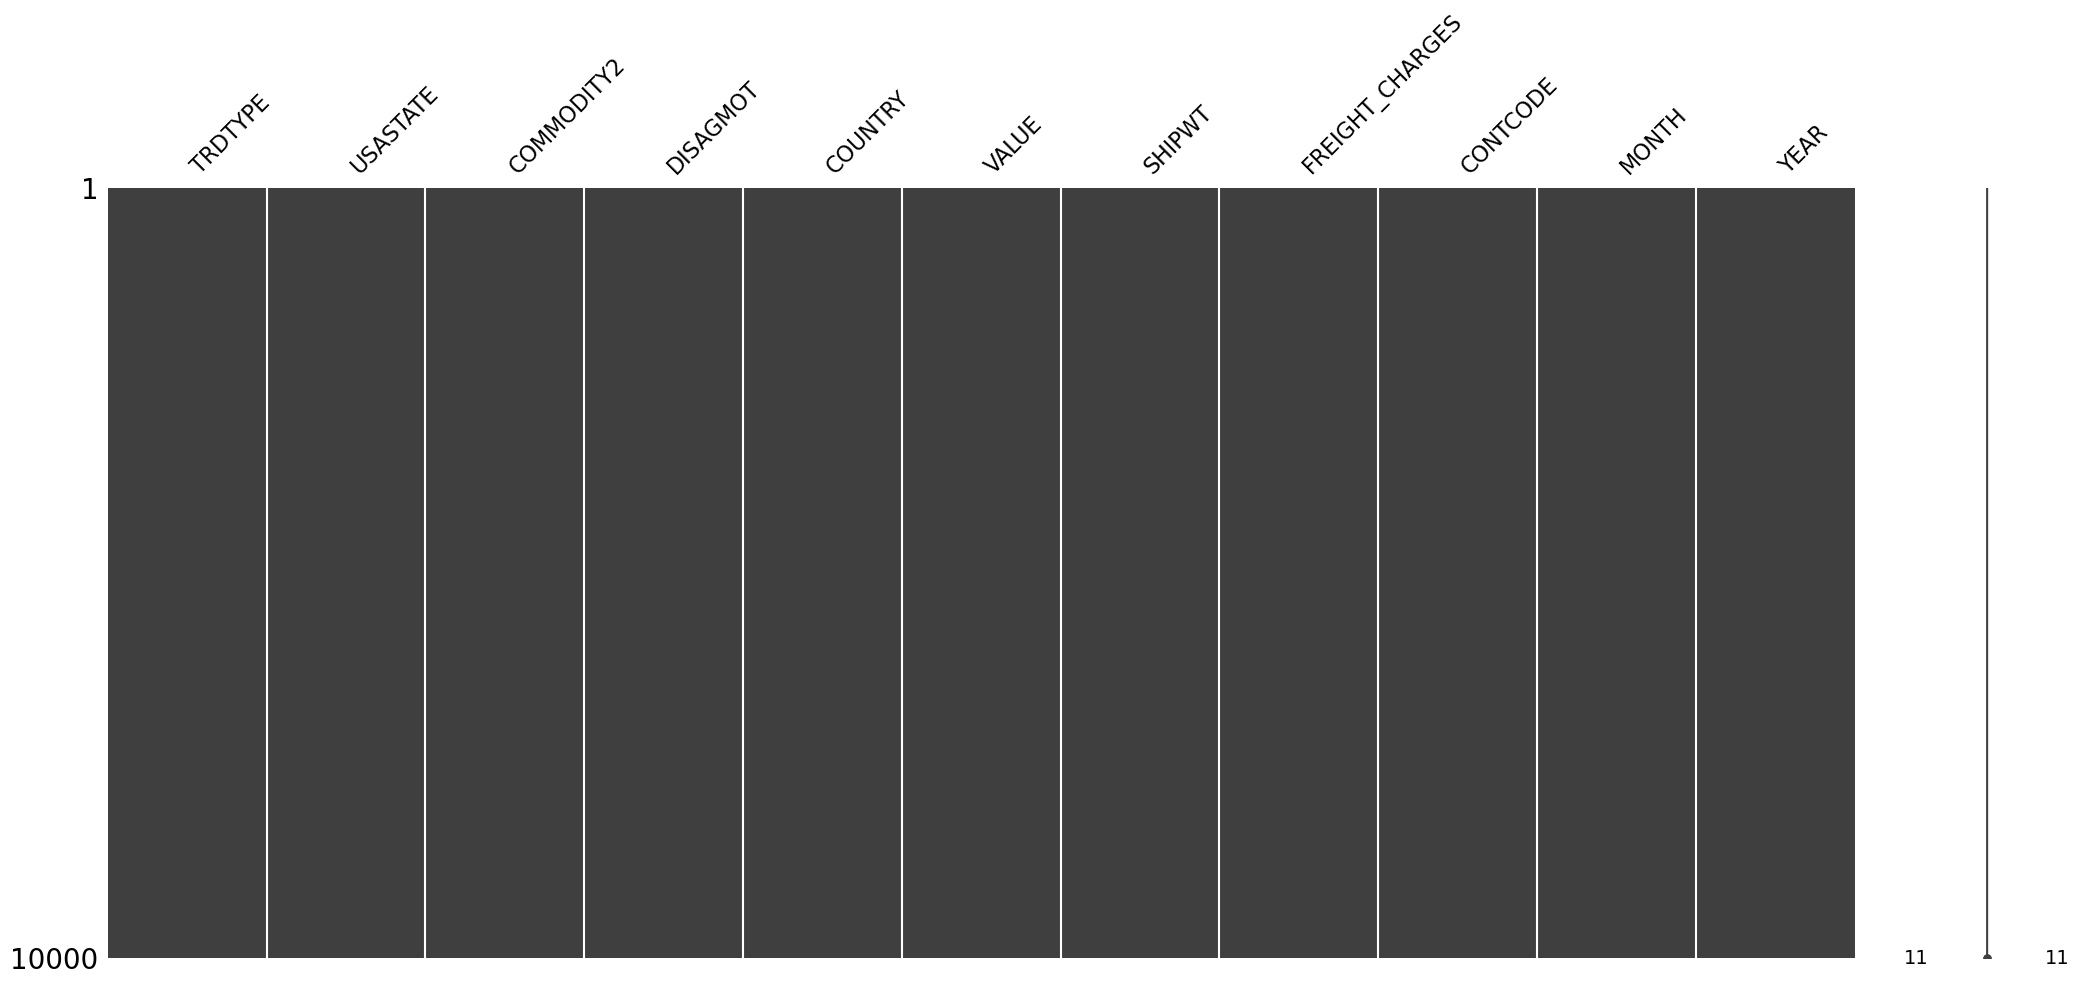

In [9]:
import numpy as np
import missingno as msno

max_rows = 10000  # Adjust this value as needed (due to large data error instance)

# Check if the number of features is less than 51
if final_df.shape[1] < 51:
    # Sample a subset of rows
    sampled_df = final_df.sample(min(final_df.shape[0], max_rows))
    
    # Generate the nullity matrix
    msno.matrix(sampled_df)
else:
    print("Number of features exceeds 50. Unable to generate nullity matrix.")


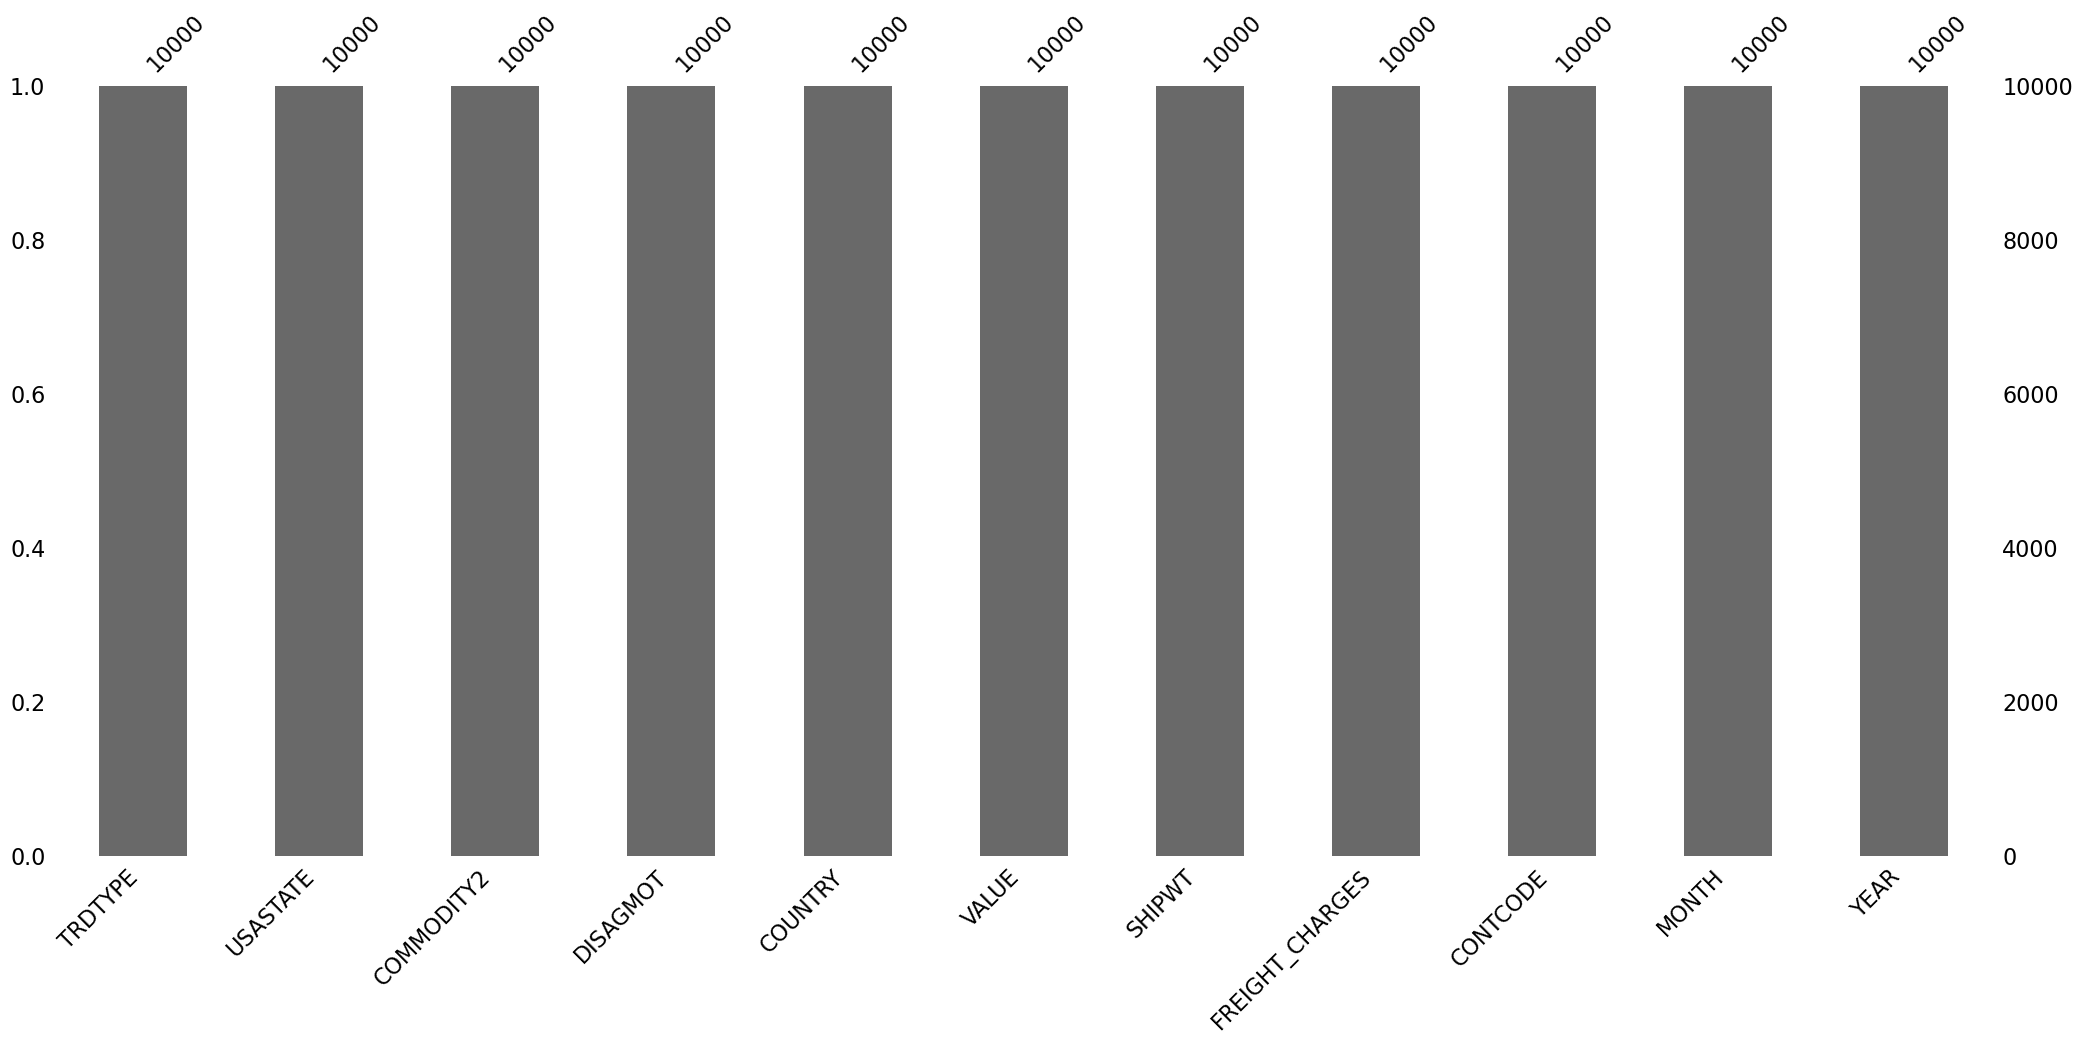

In [10]:
import missingno as msno

max_rows = 10000  # Adjust this value as needed (due to large data error instance)

# Check if the number of features is less than 51
if final_df.shape[1] < 51:
    # Sample a subset of rows
    sampled_df = final_df.sample(min(final_df.shape[0], max_rows))
    
    # Generate the nullity bar chart
    msno.bar(sampled_df)
else:
    print("Number of features exceeds 50. Unable to generate nullity bar chart.")


In [11]:
# Another way to check for nullity: Percentage of nullity (overall and by column):

totnull = final_df.isnull().sum().sum()
print("\nNumber of null values =", totnull, 'out of', size, 'total values, which is {:.5f}'.format(totnull / size * 100), "% of the data set.")


pd.set_option('display.max_rows', final_df.shape[1])
print("\nNull values in each feature\n(column) out of", shape[0], "rows:")
print(final_df.isnull().sum(), end = '')
# print the percentage of null values in each feature (column)
print("\n\nPercentage of null values in each\nfeature (column) out of", shape[0], "rows:")
print((final_df.isnull().sum() / shape[0]) * 100)
print('\n\nData types for each feature:')
final_df.dtypes


Number of null values = 0 out of 164853491 total values, which is 0.00000 % of the data set.

Null values in each feature
(column) out of 14986681 rows:
TRDTYPE            0
USASTATE           0
COMMODITY2         0
DISAGMOT           0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
CONTCODE           0
MONTH              0
YEAR               0
dtype: int64

Percentage of null values in each
feature (column) out of 14986681 rows:
TRDTYPE            0.0
USASTATE           0.0
COMMODITY2         0.0
DISAGMOT           0.0
COUNTRY            0.0
VALUE              0.0
SHIPWT             0.0
FREIGHT_CHARGES    0.0
CONTCODE           0.0
MONTH              0.0
YEAR               0.0
dtype: float64


Data types for each feature:


TRDTYPE              int64
USASTATE            object
COMMODITY2           int64
DISAGMOT             int64
COUNTRY              int64
VALUE              float64
SHIPWT             float64
FREIGHT_CHARGES    float64
CONTCODE            object
MONTH                int64
YEAR                 int64
dtype: object

In [12]:
# Unique null values in specific column:

featureName = 'FREIGHT_CHARGES'

print('Null values in', featureName, '=', final_df[featureName].isnull().sum(), '\n')
final_dfDrop = final_df.loc[final_df[featureName].notnull()]
df2 = final_dfDrop[[featureName]].copy()
print(df2)

Null values in FREIGHT_CHARGES = 0 

          FREIGHT_CHARGES
0                  7846.0
1                   461.0
2                  6186.0
3                  1348.0
4                   118.0
...                   ...
14986676             80.0
14986677             75.0
14986678           5424.0
14986679           1400.0
14986680          18374.0

[14986681 rows x 1 columns]


In [13]:
final_df.columns

Index(['TRDTYPE', 'USASTATE', 'COMMODITY2', 'DISAGMOT', 'COUNTRY', 'VALUE',
       'SHIPWT', 'FREIGHT_CHARGES', 'CONTCODE', 'MONTH', 'YEAR'],
      dtype='object')

In [14]:
# Specific columns analysis:

dclass = final_df['CONTCODE']
dclass = dclass.unique()
print(dclass)
print(len(dclass))

['X' '0' '1']
3


In [15]:
# Replace 'X' with 1 in the 'CONTCODE' column
final_df['CONTCODE'].replace('X', '1', inplace=True)

# Verify the changes
print(final_df['CONTCODE'].unique())


['1' '0']


In [16]:
# General unique values analysis:

dclass = final_df['TRDTYPE']
dclass = dclass.unique()
dclass1 = final_df['USASTATE']
dclass1 = dclass1.unique()
dclass2 = final_df['COMMODITY2']
dclass2 = dclass2.unique()
dclass3 = final_df['DISAGMOT']
dclass3 = dclass3.unique()
dclass4 = final_df['COUNTRY']
dclass4 = dclass4.unique()
dclass5 = final_df['VALUE']
dclass5 = dclass5.unique()
dclass6 = final_df['SHIPWT']
dclass6 = dclass6.unique()
dclass7 = final_df['FREIGHT_CHARGES']
dclass7 = dclass7.unique()


print(dclass)
print("Unique values in TRDTYPE:", (len(dclass)))
print()  

print(dclass1)
print("Unique values in USASTATE:", (len(dclass1)))
print()

print(dclass2)
print("Unique values in COMMODITY2:", (len(dclass2)))
print()

print(dclass3)
print("Unique values in DISAGMOT:", (len(dclass3)))
print()

print(dclass4)
print("Unique values in COUNTRY:", (len(dclass4)))
print()

print(dclass5)
print("Unique values in VALUE:", (len(dclass5)))
print()

print(dclass6)
print("Unique values in SHIPWT:", (len(dclass6)))
print()

print(dclass7)
print("Unique values in FREIGHT_CHARGES:", (len(dclass7)))
print()




[1 2]
Unique values in TRDTYPE: 2

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
Unique values in USASTATE: 52

[ 3  5 10 22 25 27 30 32 34 38 39 40 42 43 44 48 70 72 73 74 76 82 84 85
 87 88 90 91 94 97 98  1  2  4  6  8 12 16 18 19 21 23 28 29 33 36 37 47
 49 52 54 55 56 57 58 59 61 62 63 65 67 68 69 75 80 81 83 86 95 96  7 11
 15 20 31 35 41 64 71 89 92 93  9 13 14 17 24 26 46 60 78 79 45 50 51 53
 66 99]
Unique values in COMMODITY2: 98

[3 5 6 8 1 4 7 9]
Unique values in DISAGMOT: 8

[1220 2010]
Unique values in COUNTRY: 2

[ 145018.    5473.  203407. ... 2509372. 1305430. 3869432.]
Unique values in VALUE: 2350910

[8.644000e+03 1.000000e+03 0.000000e+00 ... 5.601860e+05 5.028217e+06
 4.868000e+05]
Unique values in SHIPWT: 1020528

[7.846000e+03 4.610000e+02 6.186000

In [17]:
# Unique values analysis in specific columns:

dclass = final_df[featureName]
dclass = dclass.unique()

dclass = dclass.astype(str)

print('Unique values in', featureName, '=', len(dclass), '\n')
#print(dclass)
print('\nNumber of each unique value in', featureName, ': ')
print(featureName, ' Frequency ')
print(final_df[featureName].value_counts())

Unique values in FREIGHT_CHARGES = 324354 


Number of each unique value in FREIGHT_CHARGES : 
FREIGHT_CHARGES  Frequency 
0.0          4917311
200.0          98767
100.0          95574
450.0          94436
500.0          65127
              ...   
600108.0           1
184254.0           1
1118513.0          1
393998.0           1
329425.0           1
Name: FREIGHT_CHARGES, Length: 324354, dtype: int64


In [18]:
# Check for duplicated rows in the dataset
duplicated_rows = final_df.duplicated()

# Display the count of duplicated rows
print("Number of duplicated rows:", duplicated_rows.sum())

# Display the duplicated rows 
if duplicated_rows.any():
    duplicated_data = final_df[duplicated_rows]
    print("Duplicated Rows:")
    print(duplicated_data)

Number of duplicated rows: 518527
Duplicated Rows:
          TRDTYPE USASTATE  COMMODITY2  DISAGMOT  COUNTRY    VALUE   SHIPWT  \
3064            1       CA          43         5     1220   3097.0      0.0   
3112            1       CA          44         6     2010  25402.0      0.0   
4276            1       CA          87         5     2010   2800.0      0.0   
4290            1       CA          87         5     2010   3000.0      0.0   
10248           1       ID          20         6     2010  51751.0      0.0   
...           ...      ...         ...       ...      ...      ...      ...   
14950670        1       RI          84         5     2010   4207.0      0.0   
14960651        1       WA          87         8     2010   3365.0      0.0   
14964622        2       CA          30         5     1220   3770.0      1.0   
14964625        2       CA          30         5     1220   3770.0      1.0   
14975342        2       MT          44         5     1220   5130.0  10904.0   



In [19]:
# Get unique duplicated rows
unique_duplicated_data = duplicated_data[duplicated_data.duplicated(keep=False)]
print("Unique Duplicated Rows:")
print(unique_duplicated_data)


Unique Duplicated Rows:
          TRDTYPE USASTATE  COMMODITY2  DISAGMOT  COUNTRY   VALUE  SHIPWT  \
204656          1       ME          61         5     1220  4394.0     0.0   
204657          1       ME          61         5     1220  4394.0     0.0   
411473          1       RI          40         6     1220  7045.0     0.0   
411474          1       RI          40         6     1220  7045.0     0.0   
469028          1       NM          87         5     2010  3000.0     0.0   
...           ...      ...         ...       ...      ...     ...     ...   
14913862        1       CA          73         6     2010  4320.0     0.0   
14931230        1       MD          87         8     2010  3365.0     0.0   
14931237        1       MD          87         8     2010  3365.0     0.0   
14964622        2       CA          30         5     1220  3770.0     1.0   
14964625        2       CA          30         5     1220  3770.0     1.0   

          FREIGHT_CHARGES CONTCODE  MONTH  YEAR  
2

In [20]:
print("1:Identified duplicated rows in raw dataset due to merchandise being imported/exported to different places")

print ("2:Those places are Mexican and Canadian provinces (which were removed from df)")

print("3:Considering removal of duplicates based on project goals.")

print("4:Assessing impact on analysis before deciding...")



1:Identified duplicated rows in raw dataset due to merchandise being imported/exported to different places
2:Those places are Mexican and Canadian provinces (which were removed from df)
3:Considering removal of duplicates based on project goals.
4:Assessing impact on analysis before deciding...


In [21]:
# Column names check:

features = final_df.columns
features = features[0:len(final_df.columns)]
print(features)

Index(['TRDTYPE', 'USASTATE', 'COMMODITY2', 'DISAGMOT', 'COUNTRY', 'VALUE',
       'SHIPWT', 'FREIGHT_CHARGES', 'CONTCODE', 'MONTH', 'YEAR'],
      dtype='object')


In [22]:
print(final_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986681 entries, 0 to 14986680
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   COMMODITY2       int64  
 3   DISAGMOT         int64  
 4   COUNTRY          int64  
 5   VALUE            float64
 6   SHIPWT           float64
 7   FREIGHT_CHARGES  float64
 8   CONTCODE         object 
 9   MONTH            int64  
 10  YEAR             int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 1.2+ GB
None


In [26]:
# Convert CONTCODE column to int64
final_df['CONTCODE'] = final_df['CONTCODE'].astype(int)

# Check the data types after conversion
print(final_df.dtypes)

TRDTYPE              int64
USASTATE            object
COMMODITY2           int64
DISAGMOT             int64
COUNTRY              int64
VALUE              float64
SHIPWT             float64
FREIGHT_CHARGES    float64
CONTCODE             int32
MONTH                int64
YEAR                 int64
dtype: object
